In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# 데이터 불러오기
data = pd.read_csv('C:/Workspace/Comento_Data_Analyst/train_mdf.csv')

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# 수치형 변수
num = data.dtypes[data.dtypes != "object"].index
print(num)

# 범주형 변수
cat = data.dtypes[data.dtypes == "object"].index
print(cat)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

In [5]:
print(len(data.dtypes[data.dtypes != "object"]))
print(len(data.dtypes[data.dtypes == "object"]))

38
43


In [6]:
# 결측치
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# 이상치 탐색 및 제거
def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    return multiple_outliers


data_Outliers_drop = detect_outliers(data, 2, ['Id', 'MSSubClass', 'LotFrontage', 
                'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])

In [8]:
data.loc[data_Outliers_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500


In [9]:
# 이상치 제거 저장
data = data.drop(data_Outliers_drop, axis = 0).reset_index(drop=True) 
data.shape

(1338, 81)

In [10]:
# 수치형 변수의 Skewness(비대칭도), Kurtosis(첨도) 확인

for col in num: 
    print('{:15}'.format(col), 
          '비대칭도 : {:04.1f}'.format(data[col].skew()), 
          ' ' , '첨도 : {:06.1f}'.format(data[col].kurt()))


Id              비대칭도 : 00.0   첨도 : -001.2
MSSubClass      비대칭도 : 01.4   첨도 : 0001.5
LotFrontage     비대칭도 : 01.6   첨도 : 0013.0
LotArea         비대칭도 : 07.8   첨도 : 0123.6
OverallQual     비대칭도 : 00.2   첨도 : -000.0
OverallCond     비대칭도 : 00.7   첨도 : 0001.2
YearBuilt       비대칭도 : -0.6   첨도 : -000.6
YearRemodAdd    비대칭도 : -0.5   첨도 : -001.3
MasVnrArea      비대칭도 : 02.7   첨도 : 0011.0
BsmtFinSF1      비대칭도 : 00.7   첨도 : -000.5
BsmtFinSF2      비대칭도 : 04.9   첨도 : 0026.9
BsmtUnfSF       비대칭도 : 00.9   첨도 : 0000.3
TotalBsmtSF     비대칭도 : 00.3   첨도 : 0001.2
1stFlrSF        비대칭도 : 00.7   첨도 : 0000.0
2ndFlrSF        비대칭도 : 00.8   첨도 : -000.8
LowQualFinSF    비대칭도 : 12.7   첨도 : 0170.5
GrLivArea       비대칭도 : 00.7   첨도 : 0000.5
BsmtFullBath    비대칭도 : 00.6   첨도 : -001.0
BsmtHalfBath    비대칭도 : 04.9   첨도 : 0024.7
FullBath        비대칭도 : -0.0   첨도 : -001.2
HalfBath        비대칭도 : 00.7   첨도 : -001.1
BedroomAbvGr    비대칭도 : -0.2   첨도 : 0000.9
KitchenAbvGr    비대칭도 : 05.4   첨도 : 0032.1
TotRmsAbvGrd    비대칭도 : 00.4   첨도 :

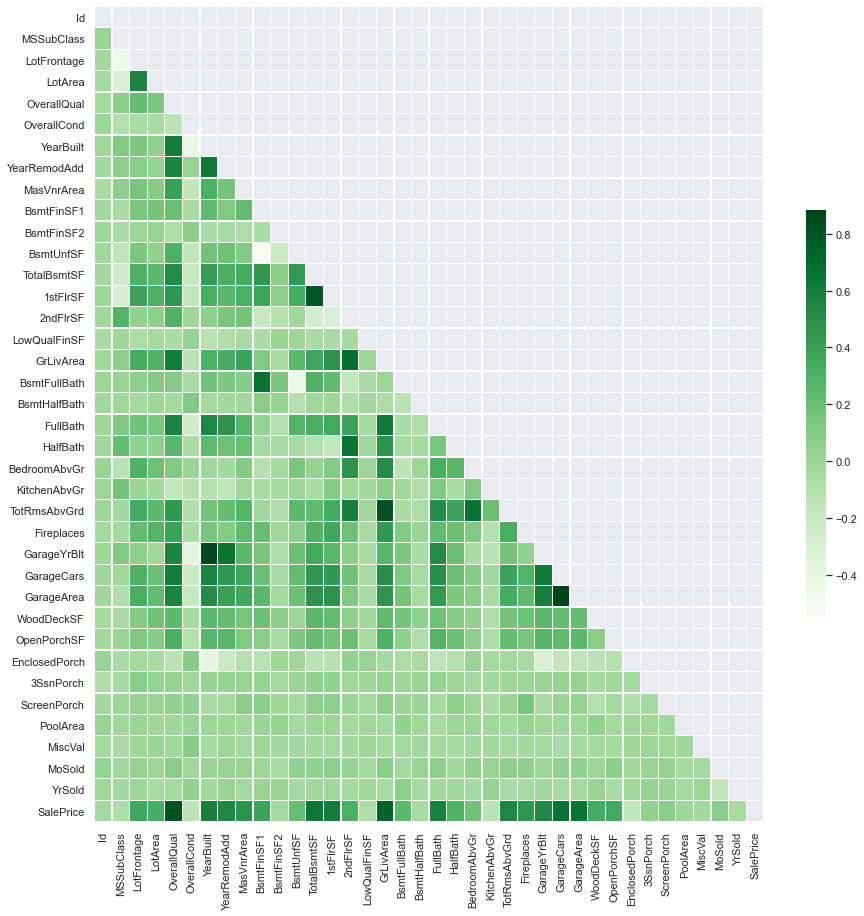

In [11]:
# 수치형 데이터 탐색 1 (Correlation Heat Map) - 변수들 간의 상관관계

cor = data[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                      'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                      'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                      '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
                      'SalePrice']] 

colormap = plt.cm.PuBu 
sns.set(font_scale=1.0) 

fig,ax = plt.subplots(figsize = (15,15)) 

np.triu(np.ones_like(cor.corr()))
mask = np.triu(np.ones_like(cor.corr(), dtype=np.bool))

sns.heatmap(cor.corr(), linewidths = 0.3, cmap = 'Greens',
            cbar_kws = {"shrink": .5}, linecolor = "white", mask = mask)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt'],
      dtype='object')


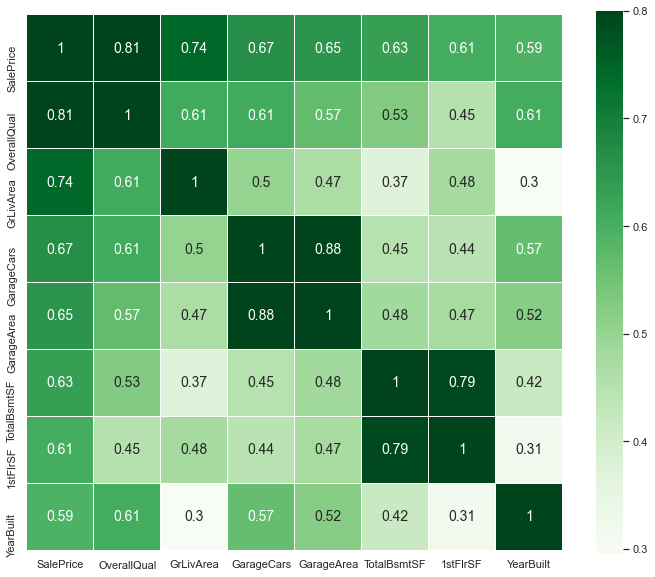

In [12]:
# 수치형 데이터 탐색 2 (Zoomed Heat Map) - 'SalePrice'와의 상관 관계

k= 8
cols = cor.corr().nlargest(k,'SalePrice')['SalePrice'].index 
print(cols) 
cm = np.corrcoef(data[cols].values.T) 
fig , ax = plt.subplots(figsize = (12,10)) 
sns.heatmap(cm, vmax=.8, linewidths=0.3,square=True,annot=True,cmap = 'Greens', 
            linecolor="white",xticklabels = cols.values,annot_kws = {'size':14},
            yticklabels = cols.values)


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


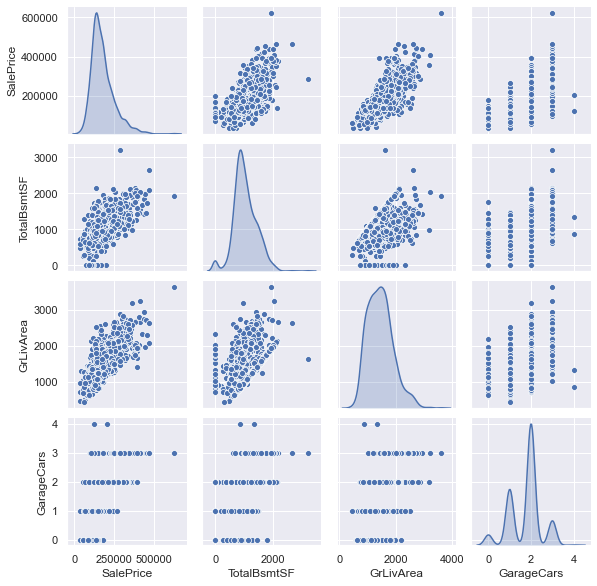

In [13]:
# 수치형 데이터 탐색 3 (Pair Plot)

sns.set() 
columns = ['SalePrice','TotalBsmtSF','GrLivArea','GarageCars'] 
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde') 
plt.show()

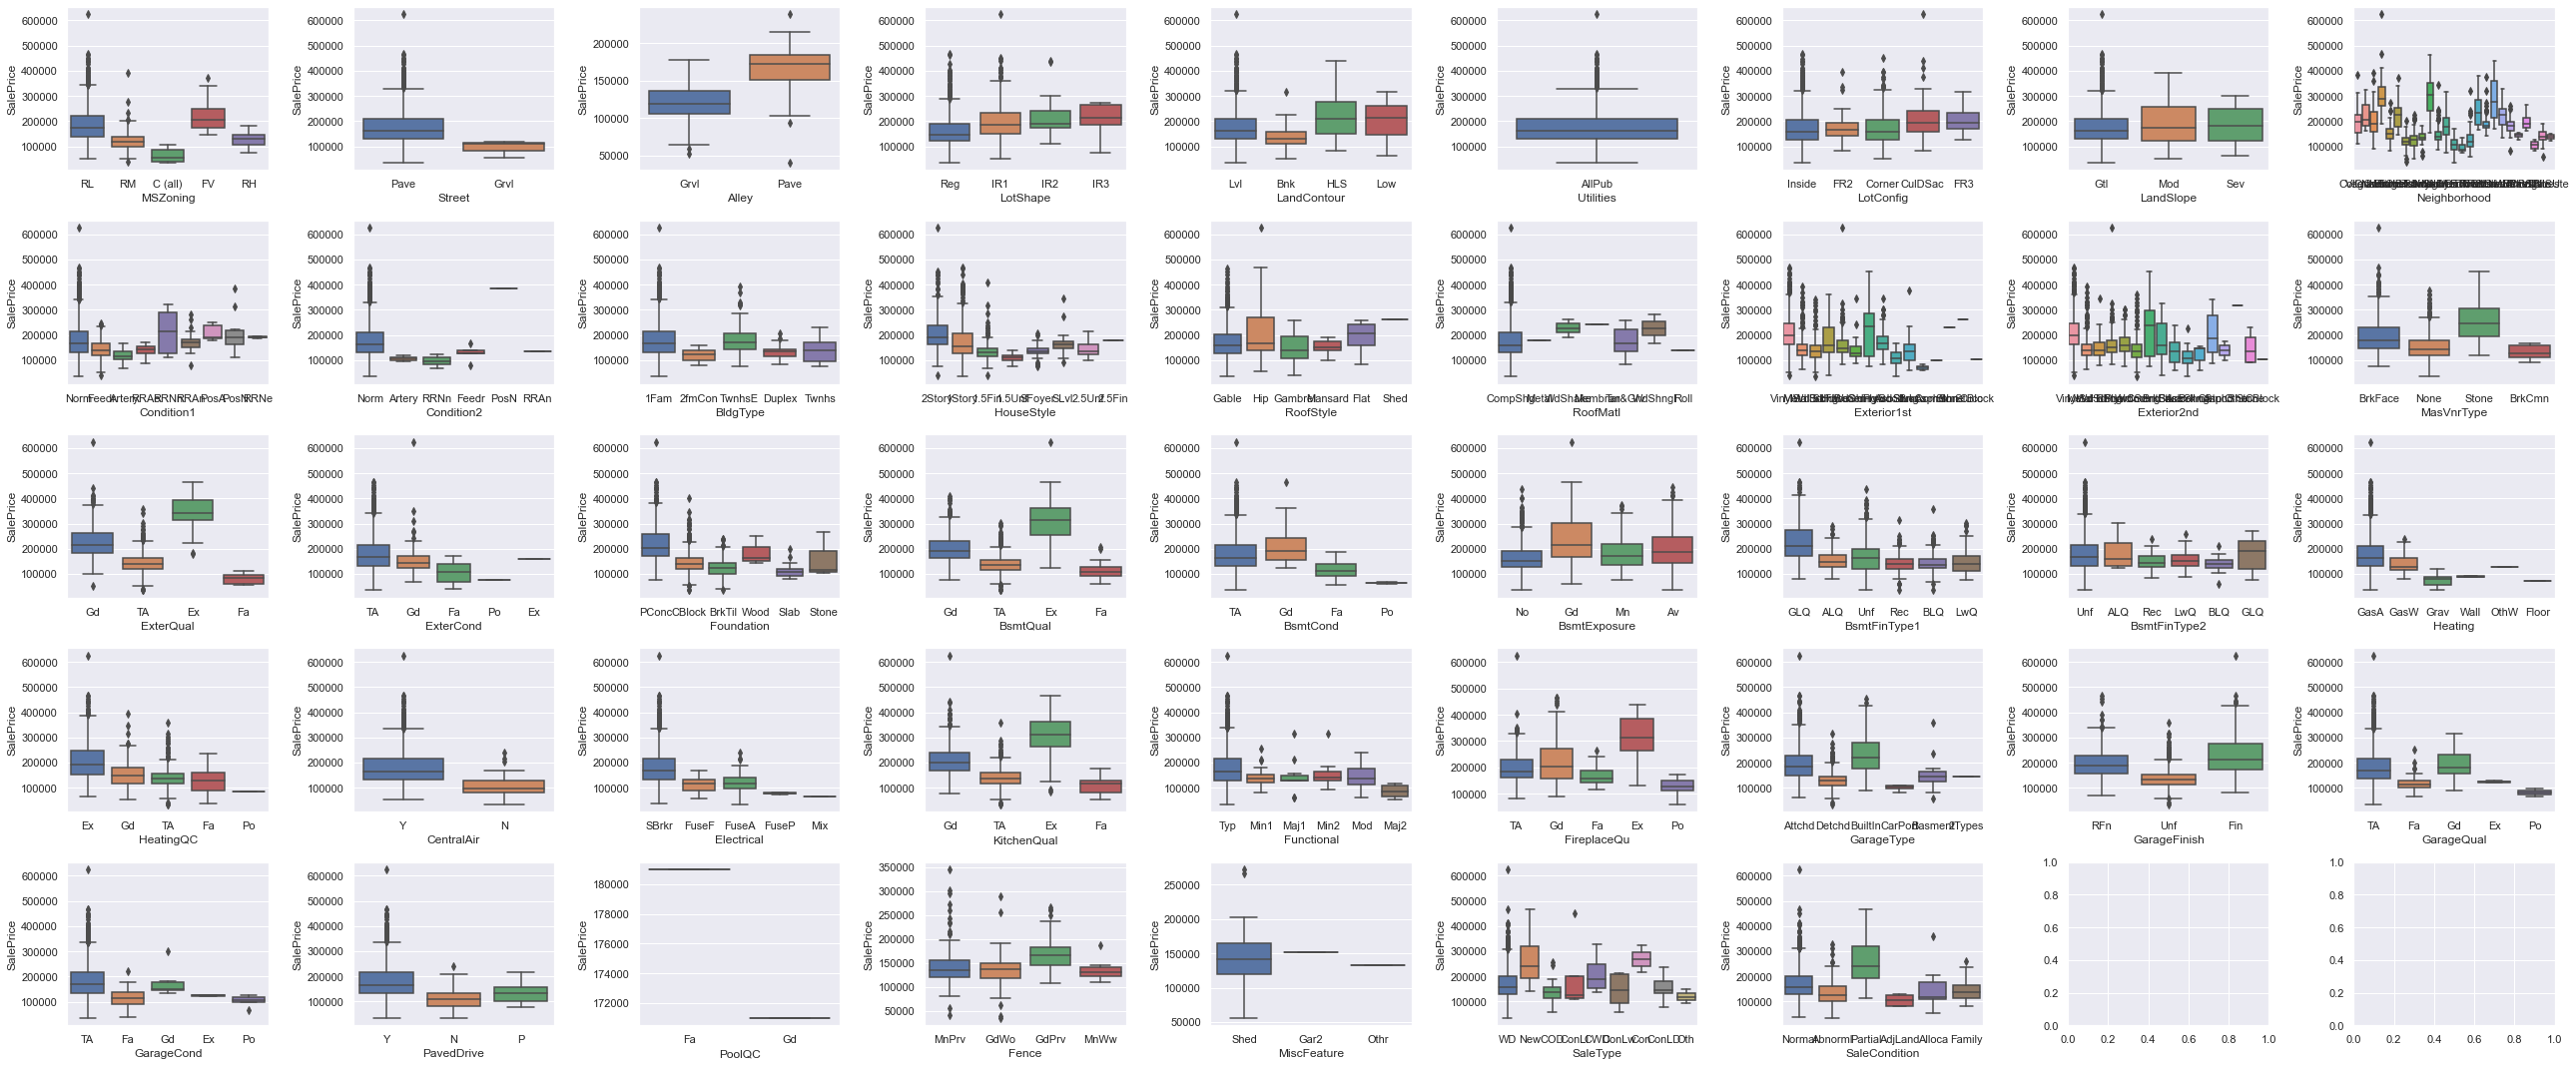

In [28]:
# 범주형 데이터 탐색
li_cat_feats = list(cat) 
nr_rows = 5
nr_cols = 9 

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3)) 

for r in range(0,nr_rows): 
    for c in range(0,nr_cols): 
        i = r*nr_cols+c 
        if i < len(li_cat_feats): 
            sns.boxplot(x=li_cat_feats[i], y=data["SalePrice"], data=data, ax = axs[r][c]) 
            
plt.tight_layout() 
plt.show()

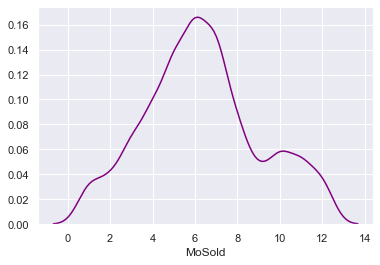

In [15]:
sns.distplot(data['MoSold'], hist=False, color='purple', bins=10)
plt.show()

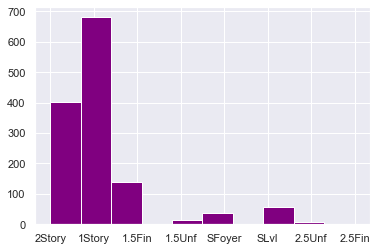

In [16]:
plt.hist(data['HouseStyle'], color='purple', bins=10)
plt.show()

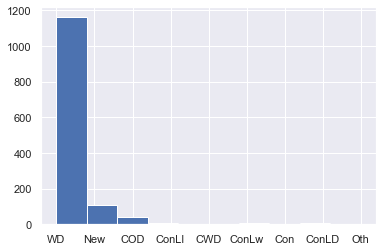

In [17]:
plt.hist(data['SaleType'], bins=10)
plt.show()

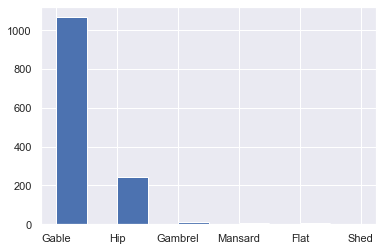

In [18]:
plt.hist(data['RoofStyle'], bins=10)
plt.show()

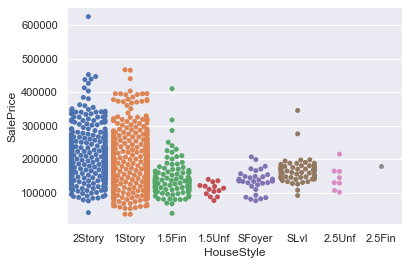

In [19]:
sns.swarmplot(data = data,
    x = "HouseStyle",
    y = "SalePrice")
plt.show()

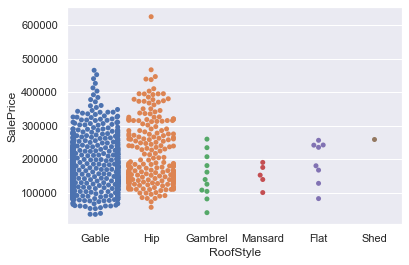

In [20]:
sns.swarmplot(data = data,
    x = "RoofStyle",
    y = "SalePrice")
plt.show()

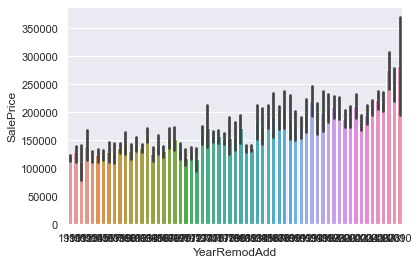

In [21]:
sns.barplot(data = data,
    x = "YearRemodAdd",
    y = "SalePrice")
plt.show()

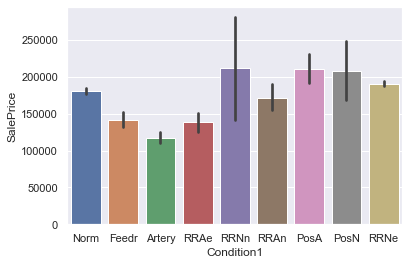

In [22]:
sns.barplot(data = data,
    x = "Condition1",
    y = "SalePrice")
plt.show()

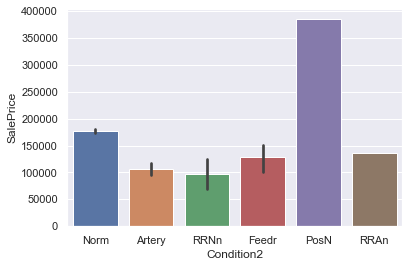

In [23]:
sns.barplot(data = data,
    x = "Condition2",
    y = "SalePrice")
plt.show() 

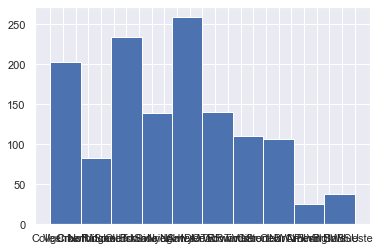

In [24]:
plt.hist(data['Neighborhood'], bins=10)
plt.show()